___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Упражнения по логистической регрессии

**Задача: Создать модель классификации для предосказания того, есть ли у пациента признаки болезни сердца, в зависимости от физических характеристик этого человека (возраст, пол, холистерол и т.д.)**

**Выполните задания, указанные жирным шрифтом.**

## Imports

**ЗАДАНИЕ: Выполните команду ниже, чтобы импортировать нужные библиотеки.**

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

В базе данных содержатся 14 атрибутов о физическом тестировании пациентов. Они сдают кровь и выполняют небольшой физический тест. Колонка "goal" указывает на наличие заболевания сердца у пациента - 0 означает заболевания нет, 1 означает заболевание есть. В общем случае, подтвердить на 100% заболевание сердца это очень инвазивный процесс, поэтому если мы сможем построить модель, которая достаточно точно оценивает вероятность заболевания, то это поможет избежать дорогих инвазивных процедур.

Содержимое

Информация об атрибутах:

* age - возраст
* sex - пол
* cp - chest pain - тип боли в груди (4 значения)
* trestbps - resting blood pressure - давление в состоянии покоя
* chol - уровень холистерина в крови, в mg/dl
* fbs - fasting blood sugar - уровень сахара в крови, > 120 mg/dl
* restecg - resting electrocardiographic results - результаты электрокардиограммы (значнеия 0,1,2)
* thalach - максимальный пульс
* exang - exercise induced angina - возникновение ангины в результате упражнений
* oldpeak = пиковые значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* slope - наклон пикового значения в электрокардиограмме, как результат упражнений (по сравнению с состоянием покоя)
* ca - количество крупных сосудов (0-3), окрашенных флурозопией
* thal -  3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект
* target - 0 означает отсутствие заболевания сердца, 1 означает наличие заболевания сердца

Источник: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

----

**ЗАДАЧА: Запустите ячейку ниже, чтобы прочитать файл с данными.**

In [74]:
df = pd.read_csv('../DATA/heart.csv')

In [75]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
df['target'].unique()

array([1, 0])

In [338]:
df_cat = pd.get_dummies(data=df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']].astype(str), dtype=int, drop_first=True)
df_cat.head()

,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,1,0,0,1,1,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,1,0
3,1,1,0,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,1,0,1,0,1,0,1,0


In [340]:
df_num = df.drop(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], axis=1)
df = pd.concat([df_num, df_cat], axis=1)

### Анализ данных и визуализация данных

Можете дополнительно исследовать данные.

**ЗАДАНИЕ: Посмотрите, есть ли в наборе данных отсутствующие значения, и создайте статистический отчёт о числовых колонках, как показано ниже.**

In [342]:
# Напишите Ваш код здесь
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    int64  
 1   trestbps   303 non-null    int64  
 2   chol       303 non-null    int64  
 3   thalach    303 non-null    int64  
 4   oldpeak    303 non-null    float64
 5   ca         303 non-null    int64  
 6   target     303 non-null    int64  
 7   sex_1      303 non-null    int64  
 8   cp_1       303 non-null    int64  
 9   cp_2       303 non-null    int64  
 10  cp_3       303 non-null    int64  
 11  fbs_1      303 non-null    int64  
 12  restecg_1  303 non-null    int64  
 13  restecg_2  303 non-null    int64  
 14  exang_1    303 non-null    int64  
 15  slope_1    303 non-null    int64  
 16  slope_2    303 non-null    int64  
 17  thal_1     303 non-null    int64  
 18  thal_2     303 non-null    int64  
 19  thal_3     303 non-null    int64  
dtypes: float64

age          0
trestbps     0
chol         0
thalach      0
oldpeak      0
ca           0
target       0
sex_1        0
cp_1         0
cp_2         0
cp_3         0
fbs_1        0
restecg_1    0
restecg_2    0
exang_1      0
slope_1      0
slope_2      0
thal_1       0
thal_2       0
thal_3       0
dtype: int64

In [343]:
# Напишите Ваш код здесь
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,303.0,0.729373,1.022606,0.0,0.0,0.0,1.0,4.0
target,303.0,0.544554,0.498835,0.0,0.0,1.0,1.0,1.0
sex_1,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp_1,303.0,0.165017,0.371809,0.0,0.0,0.0,0.0,1.0
cp_2,303.0,0.287129,0.453171,0.0,0.0,0.0,1.0,1.0


### Задачи по визуализации данных

**ЗАДАНИЕ: Нарисуйте график bar plot, показывающий количество точек для каждого значения target.**

In [344]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [345]:
counts = df['target'].value_counts().reset_index()

In [346]:
counts

,target,count
0,1,165
1,0,138


<Axes: xlabel='target', ylabel='count'>

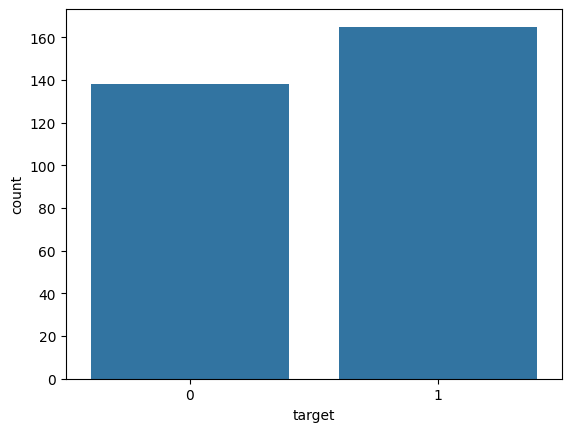

In [347]:
# Напишите Ваш код здесь
#sns.countplot(data=df, x='target')

#or

count = df['target'].value_counts().reset_index()
count.columns = ['target', 'count']

sns.barplot(data=count, x='target', y='count')

<AxesSubplot:xlabel='target', ylabel='count'>

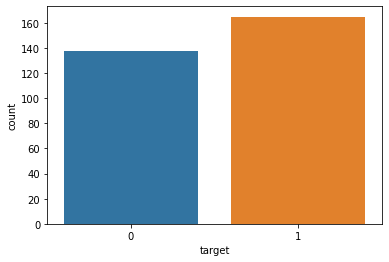

**ЗАДАНИЕ: Нарисуйте график pairplot, показывающий связи между следующими колонками:**

    ['age','trestbps', 'chol','thalach','target']
   
*Замечание: если запустить pairplot по всем колонкам, то это заняло бы очень много времени, поскольку колонок много.*

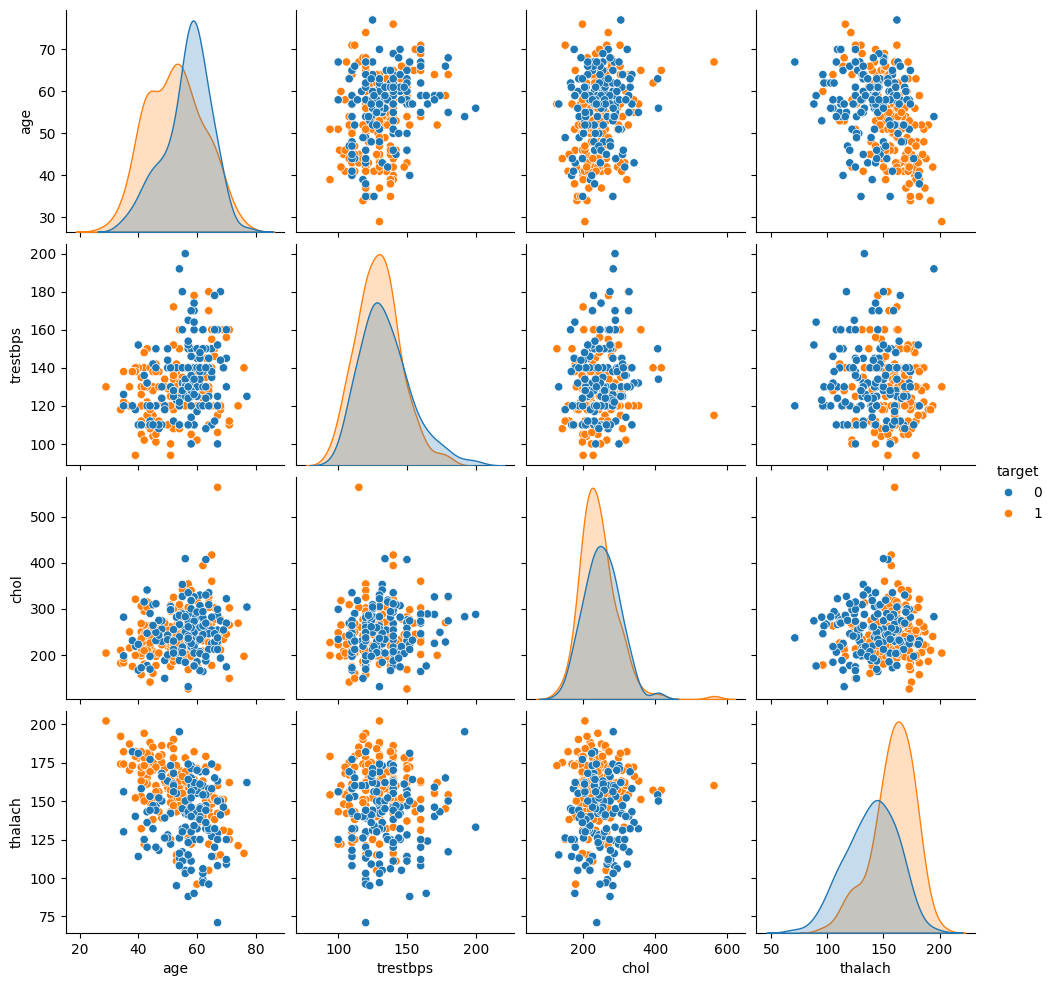

In [348]:
# Напишите Ваш код здесь
sns.pairplot(data=df[['age','trestbps', 'chol','thalach','target']]
, hue='target')

In [349]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'target',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2',
       'exang_1', 'slope_1', 'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

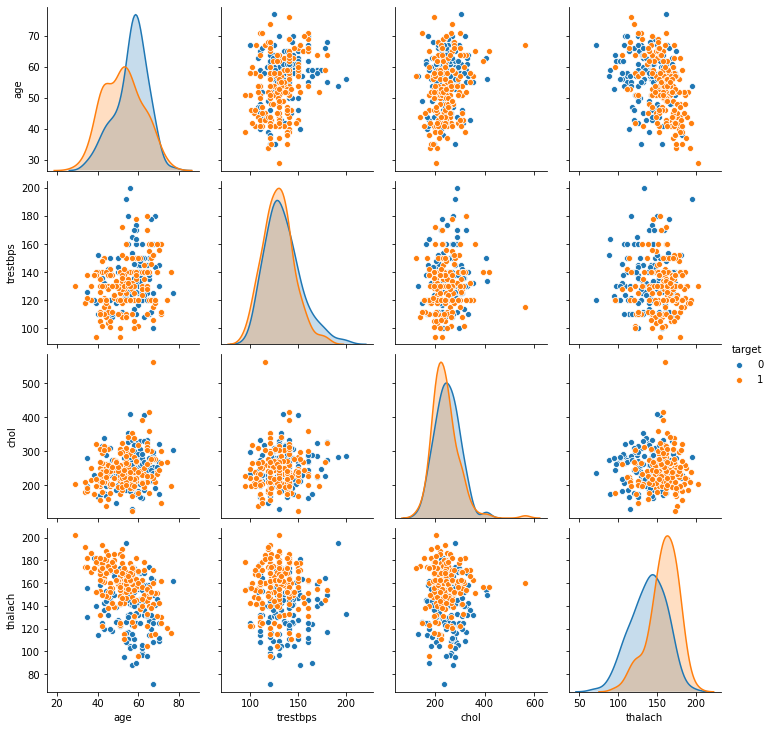

**ЗАДАНИЕ: Нарисуйте график heatmap, показывающий корреляции между всеми колонками.**

<Axes: >

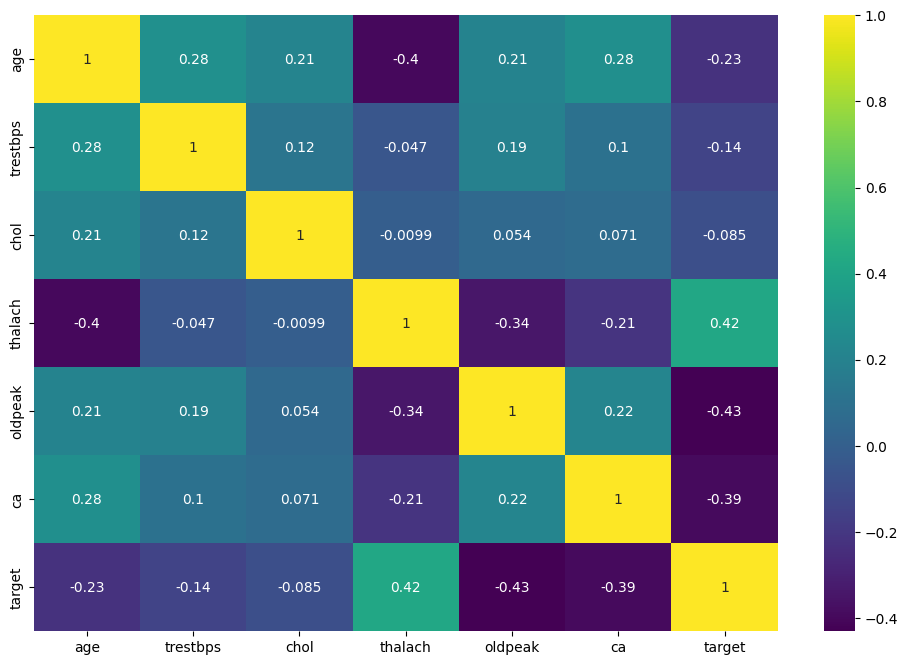

In [353]:
# Напишите Ваш код здесь
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_num.corr(), annot=True, cmap='viridis', ax=ax)

<Axes: >

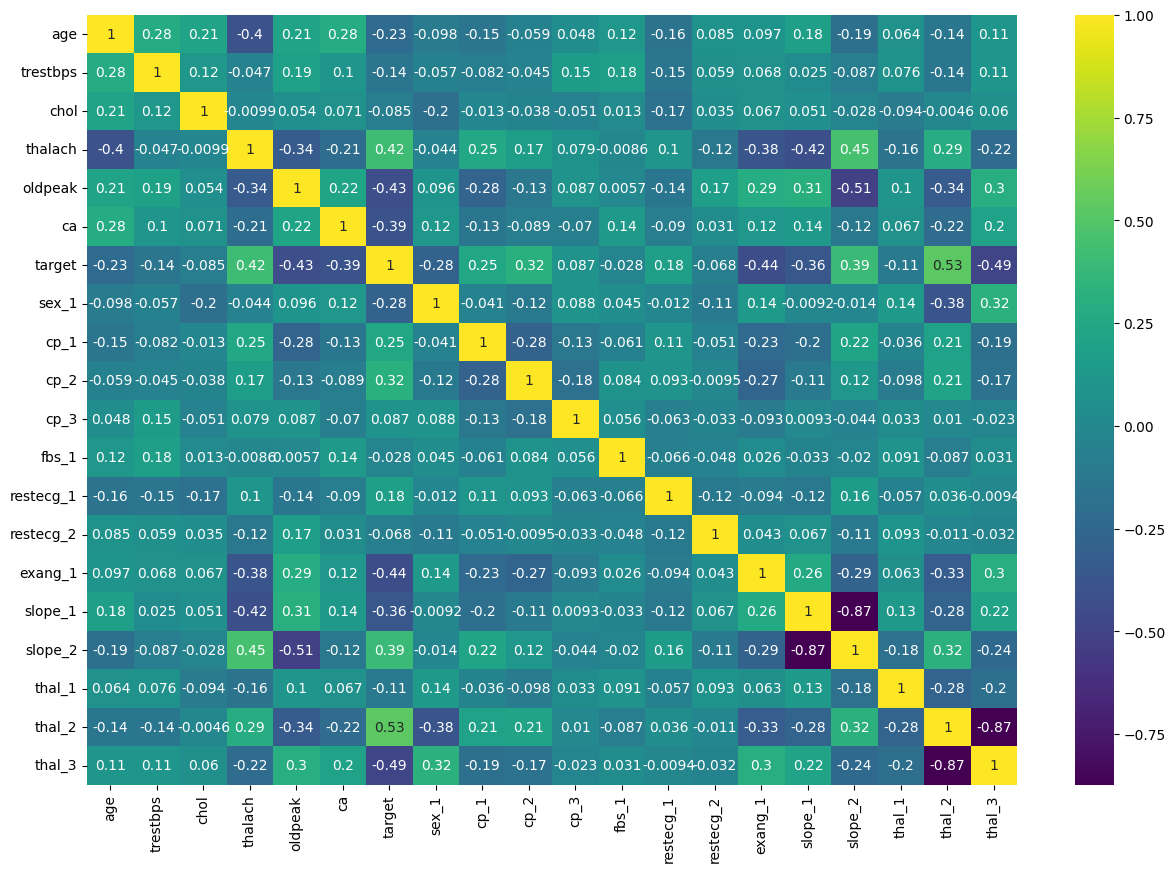

In [357]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<AxesSubplot:>

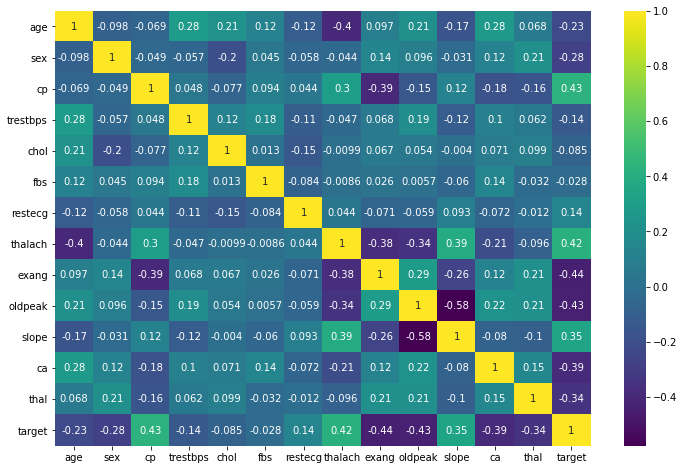

----
----

# Машинное обучение

## Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных

**ЗАДАНИЕ: разделите все признаки на 2 объекта, X и y.**

In [358]:
# Напишите Ваш код здесь
X = df.drop('target', axis=1)
y = df['target']

In [359]:
X.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exang_1,slope_1,slope_2,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,0,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,0,1,0,1,0,1,0,1,0


**ЗАДАНИЕ: разбейте данные на обучающий и тестовый наборы данных. Для тестовых данных используйте размер 10% и значение random_state=101.**

In [360]:
# Напишите Ваш код здесь
from sklearn.model_selection import train_test_split

In [361]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**ЗАДАНИЕ: С помощью объекта StandardScaler нормализуйте данные признаков в обучающем и тестовом наборах данных. При дальнейшем обучении модели убедитесь, что Вы проводите обучение только на обучающем наборе данных (без утечки данных из тестового набора данных).**

In [362]:
# Напишите Ваш код здесь
from sklearn.preprocessing import StandardScaler

In [363]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель логистической регрессии

**ЗАДАНИЕ: Создайте модель логистической регрессии, и с помощью кросс-валидации найдите хорошее значение значение C. У Вас здесь есть 2 варианта - либо *LogisticRegressionCV*, либо комбинация *LogisticRegression* и *GridSearchCV*. Выбор за Вами. В блокноте с решениями мы используем более простой способ с использованием *LogisticRegressionCV*.**

In [364]:
# Напишите Ваш код здесь
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV

In [365]:
log_cv_model = LogisticRegressionCV(solver='saga', max_iter=5000)

In [366]:
log_cv_model.fit(scaled_X_train, y_train)
log_cv_model.C_
log_cv_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 5000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0}

In [367]:
model = LogisticRegression(solver='saga', max_iter=5000)

penalty = ['l1', 'l2', 'elasticnet']
C = np.logspace(-4, 4, 10)
l1_raio = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1]


In [368]:
np.logspace(0, 4, 10)

array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04])

In [369]:
grid_model = GridSearchCV(estimator=model, param_grid={'penalty': penalty, 'C': C, 'l1_ratio': l1_raio}, cv=5, verbose=2)

In [370]:
scaled_X_train

array([[ 1.04970247, -1.23533257, -0.6689593 , ..., -0.25819889,
         0.8951673 , -0.77459667],
       [ 0.61644136, -0.83741797, -0.30815971, ..., -0.25819889,
        -1.11710961,  1.29099445],
       [-0.68334197, -1.23533257, -0.32714917, ..., -0.25819889,
        -1.11710961,  1.29099445],
       ...,
       [-0.89997253, -1.74693706, -0.93481164, ..., -0.25819889,
        -1.11710961,  1.29099445],
       [-1.44154891,  0.18579101, -0.82087492, ...,  3.87298335,
        -1.11710961, -0.77459667],
       [-0.68334197, -0.09843371,  0.54636564, ..., -0.25819889,
         0.8951673 , -0.77459667]], shape=(272, 19))

In [371]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 330 candidates, totalling 1650 fits
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ...........C=0.0001, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END ...........C=0.0001, l1_ratio=0, pen

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .........C=0.0001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END .........C=0.0001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END .........C=0.0001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END .........C=0.0001, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ...................C=0.0001, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ...................

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ...C=0.000774263682681127, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...C=0.000774263682681127, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...C=0.000774263682681127, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ...C=0.000774263682681127, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...C=0.000774263682681127, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...C=0.000774263682681127, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...C=0.000774263682681127, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ...C=0.000774263682681127, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END C=0.000774263682681127, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=0.000774263682681127, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=0.000774263682681127, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=0.000774263682681127, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END C=0.005994842503189409, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=0.005994842503189409, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=0.005994842503189409, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END ...C=0.005994842503189409, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...C=0.005994842503189409, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...C=0.005994842503189409, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...C=0.005994842503189409, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...C=0.005994842503189409, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ...C=0.005994842503189409, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...C=0.005994842503189409, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...C=0.005994842503189409, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...C=0.005994842503189409, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ...C

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ...C=0.046415888336127774, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...C=0.046415888336127774, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...C=0.046415888336127774, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...C=0.046415888336127774, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ...C=0.046415888336127774, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END C=0.046415888336127774, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=0.046415888336127774, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=0.046415888336127774, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=0.046415888336127774, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=0.046415888336127774, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ...C=0.046415888336127774, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ...C=0.046415888336127774, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=0.3593813663804626, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=0.3593813663804626, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ....

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END C=0.3593813663804626, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=0.3593813663804626, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END C=0.3593813663804626, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=0.3593813663804626, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ........C=2.782559402207126, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ........C=2.782559402207126, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ........C=2.782559402207126, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ........C=2.782559402207126, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ........C=2.782559402207126, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ........C=2.782559402207126, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ........C=2.782559402207126, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ........C=2.782559402207126, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ........C=2.782

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=2.782559402207126, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=2.7825594

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=2.782559402207126, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=2

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END C=2.782559402207126, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END C=2.78255940220

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=2.782559402207126, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ......C=2

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=2.782559402207126, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END ......C=2

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END C=2.782559402207126, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ......C=2.782

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=2.782559402207126, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ......C=2.782559402207126, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=2.7825594

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ........C=2.782559402207126, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ........C=2.782559402207126, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=2.782559402207126, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END C=21.54434690031882, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=21.544346

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=21.54434690031882, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=21.544346

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=21.54434690031882, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ......C=21.54434690031882, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ......C=21.54434690031882, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ........C=21.54434690031882, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=21.54434690031882

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .......C=166.81005372000558, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.1, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END C=166.81005372000558, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=166.81005372000558, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ....

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=166.81005372000558, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.5, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END C=166.81005372000558, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=166.81005372000558, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.8, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=166.81005372000558, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END .....C=166.81005372000558, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ....

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .......C=166.81005372000558, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END .......C=166.81005372000558, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=1, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=166.81005372000558, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=166.81005372000558, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.1, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END C=1291.5496650148827, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.2, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1291.5496650148827, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.3, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1291.5496650148827, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.4, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1291.5496650148827, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.5, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1291.5496650148827, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.6, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1291.5496650148827, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1291.5496650148827, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


[CV] END C=1291.5496650148827, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END .....C=1291.5496650148827, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ....

d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END .......C=1291.5496650148827, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END .......C=1291.5496650148827, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END C=1291.5496650148827, l1_ratio=1, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END C=1291.5496650148827, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=0, penalty=l1; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=0, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ..................C=10000.0, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=0, penalty=l2; total time=   0.0s
[CV] END ..........C=10000.0, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=10000.0, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=10000.0, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=10000.0, l1_ratio=0, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=10000.0, l1_ratio=0, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.1, penalty=l2; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.1, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.2, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.2, penalty=elasticnet; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.3, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10000.0, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.3, penalty=elasticnet; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.4, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.4, penalty=elasticnet; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.5, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.5, penalty=elasticnet; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.6, penalty=l2; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10000.0, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.6, penalty=elasticnet; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.7, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10000.0, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.7, penalty=elasticnet; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.8, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.8, penalty=elasticnet; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l1; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ................C=10000.0, l1_ratio=0.9, penalty=l2; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ........C=10000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ........C=10000.0, l1_ratio=0.9, penalty=elasticnet; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=1, penalty=l1; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'el

[CV] END ..................C=10000.0, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=1, penalty=l1; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=1, penalty=l2; total time=   0.0s
[CV] END ..................C=10000.0, l1_ratio=1, penalty=l2; total time=   0.0s


d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
d:\PYTHON DATA SCIENCE\Stepik Course\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1221: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


[CV] END ..........C=10000.0, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=10000.0, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=10000.0, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=10000.0, l1_ratio=1, penalty=elasticnet; total time=   0.0s
[CV] END ..........C=10000.0, l1_ratio=1, penalty=elasticnet; total time=   0.0s


,estimator,LogisticRegre...solver='saga')
,param_grid,"{'C': array([1.0000...00000000e+04]), 'l1_ratio': [0, 0.1, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'elasticnet'


In [372]:
grid_model.best_params_

{'C': np.float64(0.3593813663804626), 'l1_ratio': 0.3, 'penalty': 'elasticnet'}

LogisticRegressionCV()

**ЗАДАНИЕ: Отобразите результаты поиска оптимальных параметров, особенно значение C.** 

*Замечание: Ваше значение может отличаться от найденного нами, поскольку оно зависит от метода поиска.*

In [373]:
# Напишите Ваш код здесь
grid_model.best_estimator_.C


np.float64(0.3593813663804626)

In [374]:
grid_model.best_estimator_.get_params()

{'C': np.float64(0.3593813663804626),
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': 0.3,
 'max_iter': 5000,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'elasticnet',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

array([0.04641589])

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Коэффициенты

**ЗАДАНИЕ: Отобразите коэффициенты модели.**

In [375]:
grid_model.best_estimator_.coef_

array([[-0.02651588, -0.16816284, -0.13534249,  0.29462892, -0.41102927,
        -0.8353744 , -0.50230679,  0.23467804,  0.79791517,  0.39851461,
         0.05181001,  0.15394829, -0.01799373, -0.33853669, -0.25204147,
         0.19247915,  0.13052213,  0.33749369, -0.37668142]])

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**БОНУСНОЕ ЗАДАНИЕ: Мы не показывали это в блокноте лекции, но у Вас есть все навыки, чтобы сделать это! Сделайте визуализацию коэффициентов, нарисуя их с помощью графика barplot. Дополнительно можете попробовать выяснить, как отсортировать график! Если что-то будет не получаться, то смело заглядывайте в блокнот с решениями - это можно сделать разными способами, в нашем решении мы используем комбинацию pandas и seaborn.**

In [376]:
coef = grid_model.best_estimator_.coef_
coef

array([[-0.02651588, -0.16816284, -0.13534249,  0.29462892, -0.41102927,
        -0.8353744 , -0.50230679,  0.23467804,  0.79791517,  0.39851461,
         0.05181001,  0.15394829, -0.01799373, -0.33853669, -0.25204147,
         0.19247915,  0.13052213,  0.33749369, -0.37668142]])

In [378]:
coef_df = pd.DataFrame(coef.reshape(19, 1), index=X.columns)
coef_df

,0
age,-0.026516
trestbps,-0.168163
chol,-0.135342
thalach,0.294629
oldpeak,-0.411029
ca,-0.835374
sex_1,-0.502307
cp_1,0.234678
cp_2,0.797915
cp_3,0.398515


In [379]:
coef_df = coef_df.sort_values(by=0, ascending=True)

<Axes: xlabel='None', ylabel='0'>

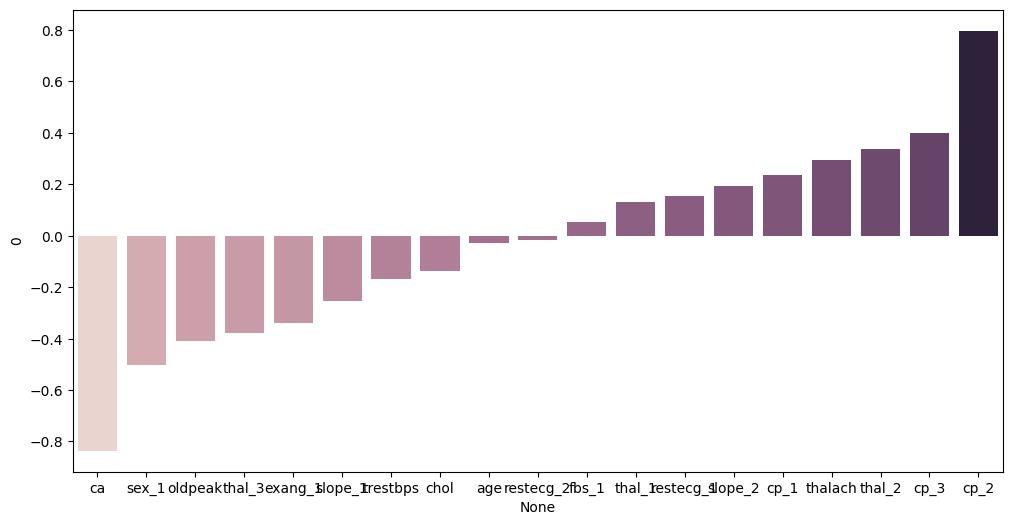

In [380]:
# Напишите Ваш код здесь
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=coef_df, x=coef_df.index, y=coef_df[0], hue=coef_df[0], legend=False, ax=ax)

In [129]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

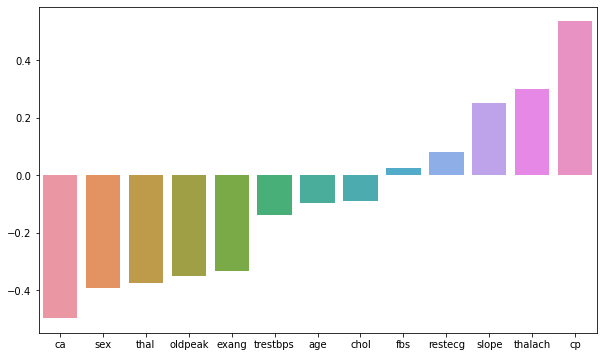

---------

## Оценка модели

**ЗАДАНИЕ: Оцените работу модели на оставшихся 10% данных - тестовом наборе данных.**

**ЗАДАНИЕ: Подготовьте следующие оценки:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [381]:
# Напишите Ваш код здесь
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [382]:
y_pred = grid_model.best_estimator_.predict(scaled_X_test)

In [383]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  2],
       [ 2, 14]])

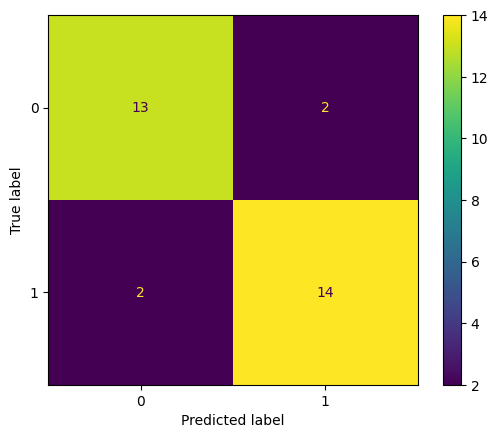

In [384]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [385]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.88      0.88      0.88        16

    accuracy                           0.87        31
   macro avg       0.87      0.87      0.87        31
weighted avg       0.87      0.87      0.87        31



array([[12,  3],
       [ 2, 14]], dtype=int64)

In [57]:
# Напишите Ваш код здесь


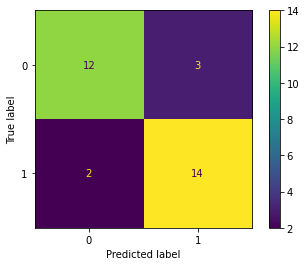

In [59]:
# Напишите Ваш код здесь


              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Кривые производительности

**ЗАДАНИЕ: Нарисуйте графики "precision recall curve" и "ROC Curve".**

In [386]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

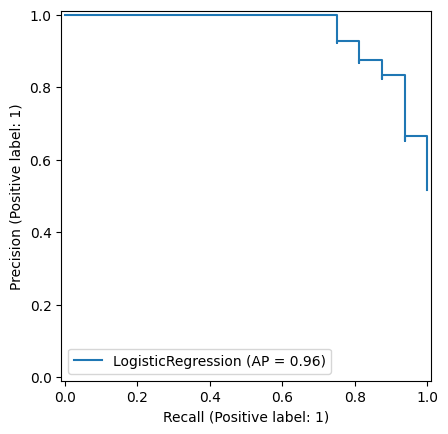

In [387]:
PrecisionRecallDisplay.from_estimator(grid_model.best_estimator_, scaled_X_test, y_test)

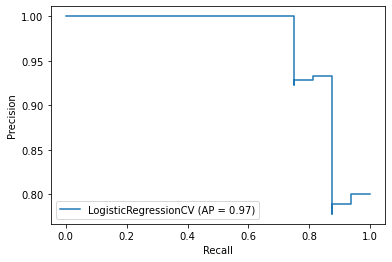

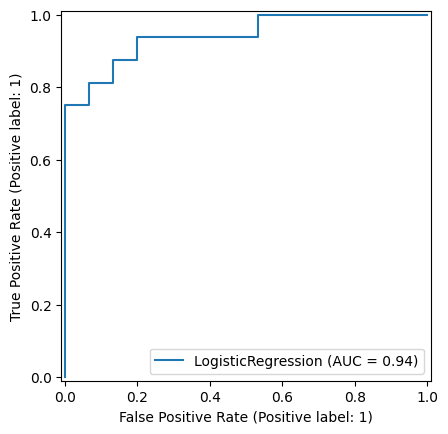

In [388]:
# Напишите Ваш код здесь
RocCurveDisplay.from_estimator(grid_model.best_estimator_, scaled_X_test, y_test)

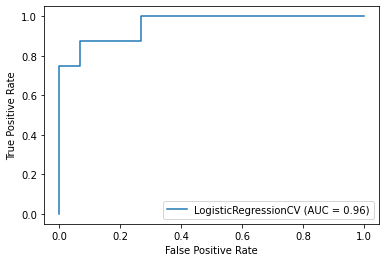

**Финальное задание: В офис клиники пришёл пациент со следующими значениями признаков:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**ЗАДАНИЕ: Что предскажет Ваша модель для этого пациента? Есть ли здесь заболевание сердца? Насколько модель "уверена" в своём прогнозе?**

*Для Вашего удобства мы создали массив с указанными выше значениями:*

In [392]:
X.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_1', 'cp_1',
       'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1', 'slope_1',
       'slope_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [ ]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [ ]:
#transformed patient data

#sx-1, cp-0, fbs-0, rsecg-0, ex-1, sl-1, thal-2
patient = [[ 54., 122. , 286., 116., 3.2, 2.,
            1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]]

In [404]:
scaled_patient = scaler.transform(pd.DataFrame(patient, columns=X.columns))

In [405]:
grid_model.best_estimator_.predict(scaled_patient)

array([0])

In [406]:
grid_model.best_estimator_.predict_proba(scaled_patient)

array([[0.9766104, 0.0233896]])

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

0

array([0], dtype=int64)

----

## Отличная работа!